In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
cus_grade = pd.read_csv('cus_grade_new.csv')
cus_grade = cus_grade.dropna()

In [9]:
cus_grade

,year,customer_id,amount,cnt,last_pur_day,m_class,f_class,r_class,amt_coef,grade,grade_num
0,2017,10015,162259,1,2017-05-24,1,1,1,1.00,BLONZE,1
1,2017,10037,91071,1,2017-06-03,1,1,1,1.00,BLONZE,1
2,2017,10044,891856,5,2017-12-19,2,3,4,2.92,SILVER,2
3,2017,10045,2415234,3,2017-10-16,3,3,2,2.71,SILVER,2
4,2017,10050,9952612,20,2017-12-30,5,5,5,5.00,VVIP,5
...,...,...,...,...,...,...,...,...,...,...,...
138066,2022,99989,171997,1,2022-04-03,1,1,1,1.00,BLONZE,1
138067,2022,9999,263256,1,2022-03-29,1,1,1,1.00,BLONZE,1
138068,2022,99992,482880,3,2022-05-25,1,2,2,1.62,BLONZE,1
138069,2022,99995,6868677,18,2022-07-29,4,5,5,4.62,VIP,4


In [10]:
# 각 grade별 고객 수 계산
grade_counts = cus_grade['grade'].value_counts()

# 전체 고객 수 계산
total_customers = len(cus_grade)

# 각 grade가 전체 고객 중에 차지하는 비율 계산
grade_percentages = (grade_counts / total_customers) * 100

print(grade_percentages)

grade
BLONZE    41.404784
SILVER    27.051300
GOLD      19.248068
VIP       10.250523
VVIP       2.045325
Name: count, dtype: float64


각 등급 별 고객 수

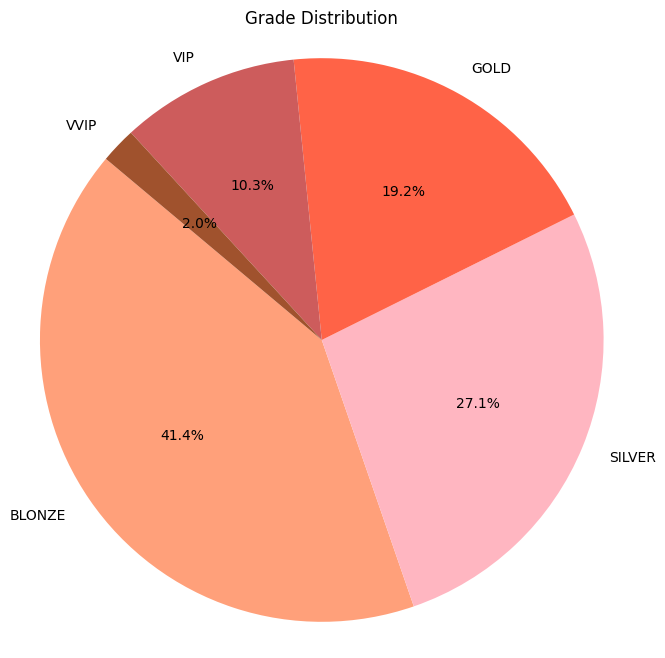

In [6]:
# 각 grade별 고객 수 계산
grade_counts = cus_grade['grade'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140, colors=[ 'lightsalmon', 'lightpink', 'tomato', 'indianred', 'sienna'])
plt.title('Grade Distribution')
plt.axis('equal')  # 원형 파이 차트로 만들기 위해 설정

# 파이 차트 표시
plt.show()

등급 하락 / 상승세

In [12]:
# 2017년과 2018년 데이터 분리
df_2017 = cus_grade[cus_grade['year'] == 2017]
df_2018 = cus_grade[cus_grade['year'] == 2018]

# 2017년에는 grade_num이 5, 2018년에는 grade_num이 4인 사람 필터링
filtered_customers = df_2017[df_2017['grade_num'] == 5].merge(df_2018[df_2018['grade_num'] == 4], on='customer_id')

# 고객별로 그룹화하여 퍼센트 계산
percentage = (len(filtered_customers) / len(df_2017[df_2017['grade_num'] == 5])) * 100

print("등급이 5에서 4로 떨어진 고객의 퍼센트: {:.2f}%".format(percentage))

등급이 5에서 4로 떨어진 고객의 퍼센트: 67.35%


C:\Users\neovi\AppData\Local\Temp\ipykernel_17496\3414768932.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{grade_mapping[from_grade]}→{grade_mapping[to_grade]}" for from_grade, to_grade in changes], rotation=45, ha="right")


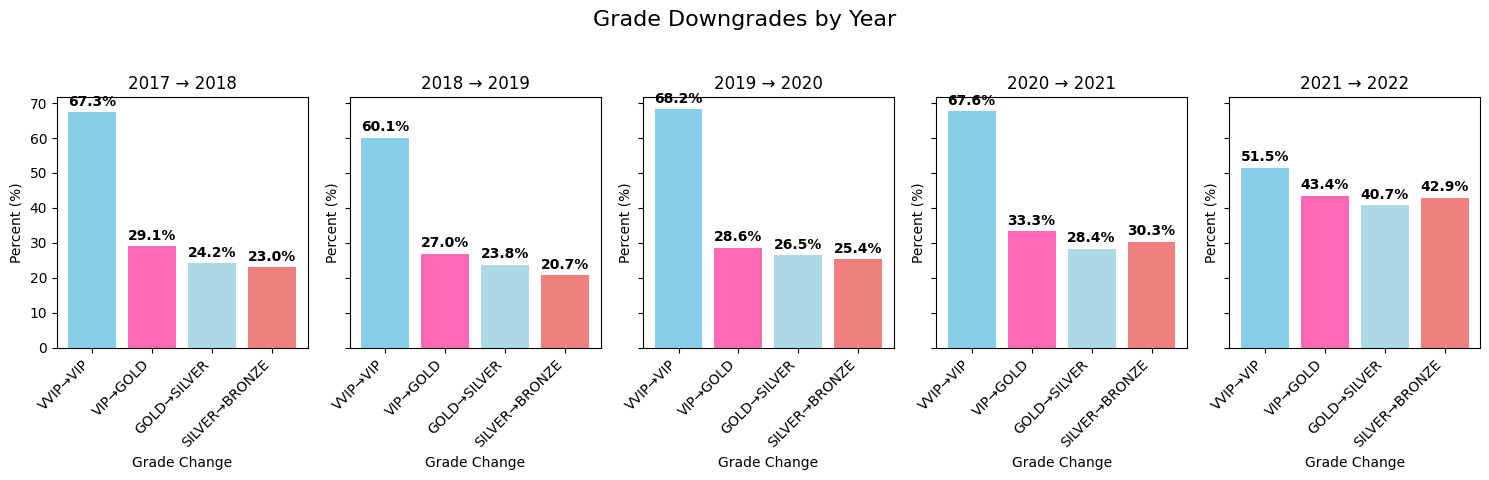

In [106]:
# 등급과 색상 매핑
grade_mapping = {
    5: 'VVIP',
    4: 'VIP',
    3: 'GOLD',
    2: 'SILVER',
    1: 'BRONZE'
}

grade_colors = {
    5: '#FFB6C1',  # 핑크
    4: '#87CEEB',  # 파랑
    3: '#FF69B4',  # 핑크
    2: '#ADD8E6',  # 파랑
    1: '#F08080'   # 핑크
}

# 등급 변화 별 퍼센트 계산 함수
def calculate_percentage(from_df, to_df, from_grade, to_grade):
    filtered_customers = from_df[from_df['grade_num'] == from_grade].merge(to_df[to_df['grade_num'] == to_grade], on='customer_id')
    percentage = (len(filtered_customers) / len(from_df[from_df['grade_num'] == from_grade])) * 100
    return percentage

# 데이터 준비
changes = [(5, 4), (4, 3), (3, 2), (2, 1)]
years = range(2017, 2022 + 1)
percentages_data = []

for year in years[:-1]:
    from_year_df = cus_grade[cus_grade['year'] == year]
    to_year_df = cus_grade[cus_grade['year'] == year + 1]
    
    percentages = []
    for from_grade, to_grade in changes:
        percentage = calculate_percentage(from_year_df, to_year_df, from_grade, to_grade)
        percentages.append(percentage)
    
    percentages_data.append(percentages)

# 서브플롯 그래프 생성
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle("Grade Downgrades by Year", fontsize=16)

for idx, ax in enumerate(axes):
    ax.bar([f"{grade_mapping[from_grade]}→{grade_mapping[to_grade]}" for from_grade, to_grade in changes], percentages_data[idx], color=[grade_colors[to_grade] for from_grade, to_grade in changes])
    ax.set_title(f"{years[idx]} → {years[idx+1]}")
    ax.set_xlabel("Grade Change")
    ax.set_ylabel("Percent (%)")
    ax.set_xticklabels([f"{grade_mapping[from_grade]}→{grade_mapping[to_grade]}" for from_grade, to_grade in changes], rotation=45, ha="right")
    for i, v in enumerate(percentages_data[idx]):
        ax.text(i, v + 1, f"{v:.1f}%", ha="center", va="bottom", color='black', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\neovi\AppData\Local\Temp\ipykernel_17496\447684746.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{grade_mapping[from_grade]}→{grade_mapping[to_grade]}" for from_grade, to_grade in changes], rotation=45, ha="right")


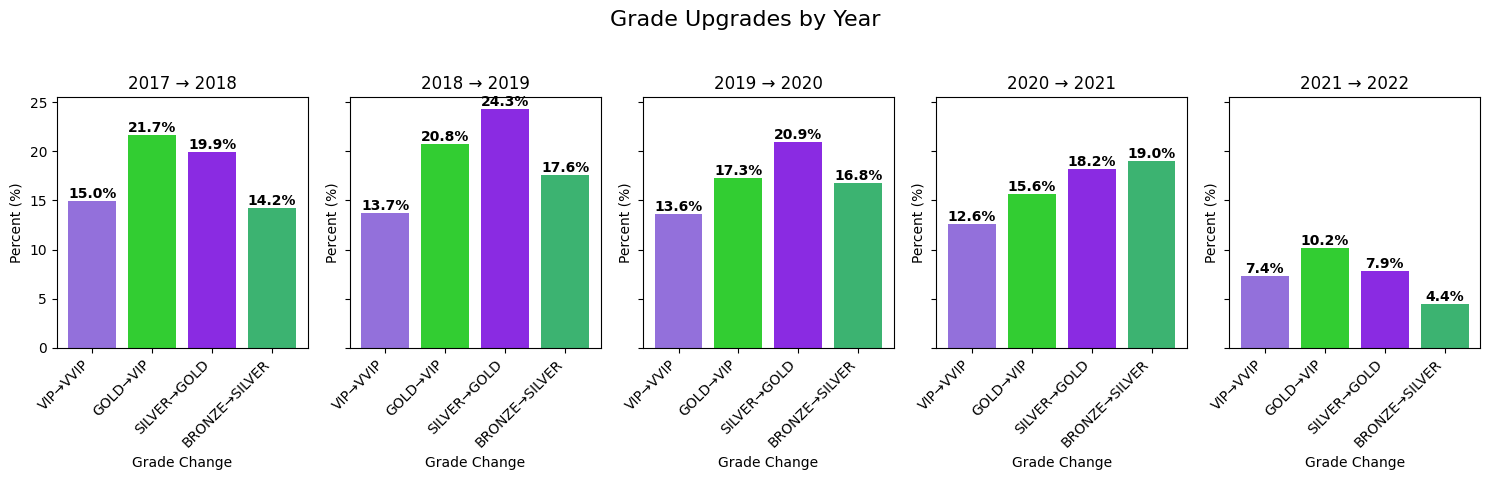

In [107]:
# 등급과 색상 매핑
grade_mapping = {
    5: 'VVIP',
    4: 'VIP',
    3: 'GOLD',
    2: 'SILVER',
    1: 'BRONZE'
}

grade_colors = {
    5: '#66CDAA',  # 연한 초록
    4: '#9370DB',  # 연한 보라
    3: '#32CD32',  # 초록
    2: '#8A2BE2',  # 보라
    1: '#3CB371'   # 연한 초록
}

# 등급 변화 별 퍼센트 계산 함수
def calculate_percentage(from_df, to_df, from_grade, to_grade):
    filtered_customers = from_df[from_df['grade_num'] == from_grade].merge(to_df[to_df['grade_num'] == to_grade], on='customer_id')
    percentage = (len(filtered_customers) / len(from_df[from_df['grade_num'] == from_grade])) * 100
    return percentage

# 데이터 준비
changes = [(4, 5), (3, 4), (2, 3), (1, 2)]
years = range(2017, 2022 + 1)
percentages_data = []

for year in years[:-1]:
    from_year_df = cus_grade[cus_grade['year'] == year]
    to_year_df = cus_grade[cus_grade['year'] == year + 1]
    
    percentages = []
    for from_grade, to_grade in changes:
        percentage = calculate_percentage(from_year_df, to_year_df, from_grade, to_grade)
        percentages.append(percentage)
    
    percentages_data.append(percentages)

# 서브플롯 그래프 생성
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle("Grade Upgrades by Year", fontsize=16)

for idx, ax in enumerate(axes):
    bars = ax.bar([f"{grade_mapping[from_grade]}→{grade_mapping[to_grade]}" for from_grade, to_grade in changes], percentages_data[idx], color=[grade_colors[from_grade] for from_grade, to_grade in changes])
    ax.set_title(f"{years[idx]} → {years[idx+1]}")
    ax.set_xlabel("Grade Change")
    ax.set_ylabel("Percent (%)")
    ax.set_xticklabels([f"{grade_mapping[from_grade]}→{grade_mapping[to_grade]}" for from_grade, to_grade in changes], rotation=45, ha="right")
    
    for bar, percentage in zip(bars, percentages_data[idx]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{percentage:.1f}%", ha="center", va="bottom", color='black', fontweight='bold', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

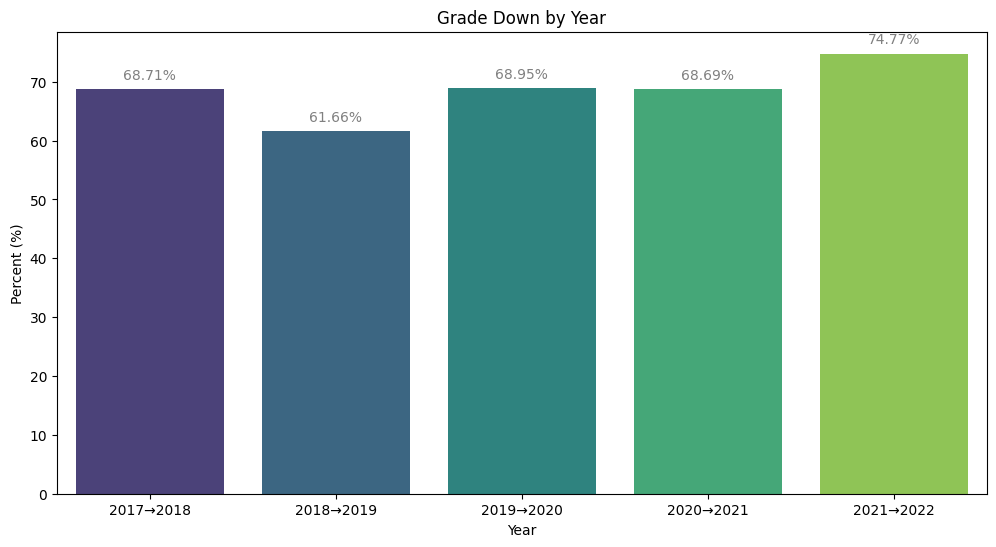

In [11]:
# 연도별 등급 변화 퍼센트 계산 함수
def calculate_percentage(from_grade, to_grades):
    total_customers = len(from_grade)
    changed_customers = len(from_grade[from_grade['customer_id'].isin(to_grades['customer_id'])])
    return (changed_customers / total_customers) * 100

# 연도별 등급 변화 퍼센트 데이터 저장
percentages_data = []

# 연도별로 등급 변화 퍼센트 계산 및 데이터 저장
for i in range(2017, 2022):
    from_year = i
    to_year = i + 1

    from_grade = cus_grade[cus_grade['year'] == from_year]
    to_grade = cus_grade[cus_grade['year'] == to_year]

    changed_customers = from_grade[from_grade['grade_num'] == 5]
    to_grades = to_grade[to_grade['grade_num'] < 5]

    percentage = calculate_percentage(changed_customers, to_grades)
    percentages_data.append(percentage)

# Sequential 색상 팔레트 생성
sequential_palette = sns.color_palette("viridis", n_colors=len(percentages_data))

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=[f"{i}→{i+1}" for i in range(2017, 2022)], y=percentages_data, palette=sequential_palette)
plt.title("Grade Down by Year")
plt.ylabel("Percent (%)")
plt.xlabel("Year")

# 막대 위에 퍼센트 값 나타내기
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 10),
                textcoords='offset points')

plt.show()

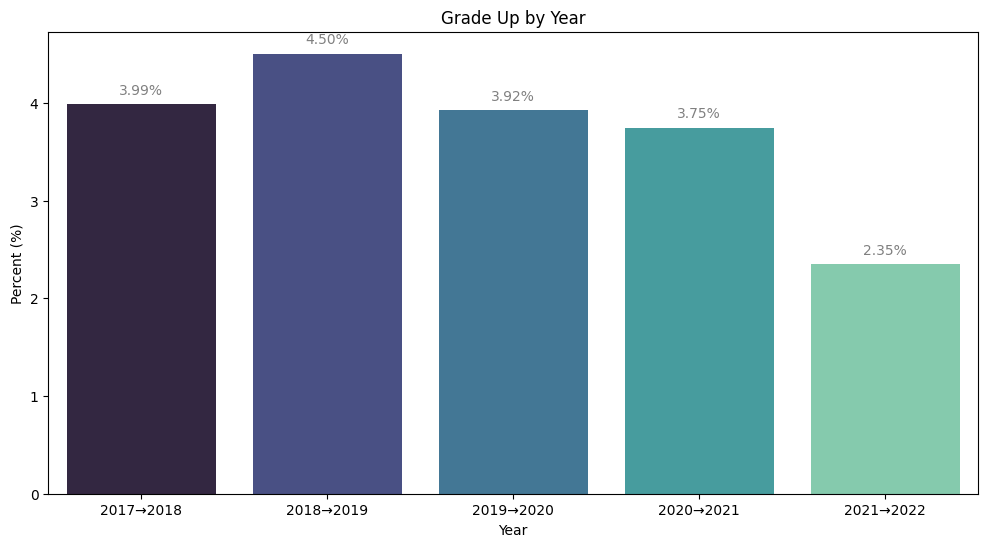

In [112]:
# 연도별 등급 변화 퍼센트 계산 함수
def calculate_percentage(from_grade, to_grades):
    total_customers = len(from_grade)
    changed_customers = len(from_grade[from_grade['customer_id'].isin(to_grades['customer_id'])])
    return (changed_customers / total_customers) * 100

# 연도별 등급 변화 퍼센트 데이터 저장
percentages_data = []

# 연도별로 등급 변화 퍼센트 계산 및 데이터 저장
for i in range(2017, 2022):
    from_year = i
    to_year = i + 1

    from_grade = cus_grade[cus_grade['year'] == from_year]
    to_grade = cus_grade[cus_grade['year'] == to_year]

    changed_customers = from_grade[from_grade['grade_num'] > 1]  # 등급이 1(BRONZE)보다 높은 고객 선택
    to_grades = to_grade[to_grade['grade_num'] == 5]  # 등급이 5(VVIP)인 고객 선택

    percentage = calculate_percentage(changed_customers, to_grades)
    percentages_data.append(percentage)

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=[f"{i}→{i+1}" for i in range(2017, 2022)], y=percentages_data, palette="mako")
plt.title("Grade Up by Year")
plt.ylabel("Percent (%)")
plt.xlabel("Year")

# 막대 위에 퍼센트 값 나타내기
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [12]:
cus_churn = pd.read_csv('cus_churn.csv')
cus_churn

,year,customer_id,gender,age,age_zone,join_yr,last_pur_day,cnt,amount,cus_status
0,2017,10037,M,18,10,2017,2017-06-03,1,91071,0.0
1,2017,10054,F,37,30,2017,2017-11-11,1,344457,0.0
2,2017,10120,M,28,20,2017,2017-02-19,1,134563,0.0
3,2017,10122,M,41,40,2017,2017-02-05,1,366698,0.0
4,2017,10167,F,30,30,2017,2017-12-30,80,93825414,0.0
...,...,...,...,...,...,...,...,...,...,...
323623,2022,99230,F,25,20,2021,2022-02-03,2,984074,0.0
323624,2022,99387,M,39,30,2021,2022-05-17,2,564173,0.0
323625,2022,99877,F,32,30,2021,NaN,0,0,0.0
323626,2022,99127,F,28,20,2022,2022-07-21,10,26461213,3.0


이탈 관련

In [3]:
# cus_status 열에서 null 값을 1로 채우기
cus_churn['cus_status'].fillna(1, inplace=True)

In [4]:
cus_churn

,year,customer_id,gender,age,age_zone,join_yr,last_pur_day,cnt,amount,cus_status
0,2017,10037,M,18,10,2017,2017-06-03,1,91071,0.0
1,2017,10054,F,37,30,2017,2017-11-11,1,344457,0.0
2,2017,10120,M,28,20,2017,2017-02-19,1,134563,0.0
3,2017,10122,M,41,40,2017,2017-02-05,1,366698,0.0
4,2017,10167,F,30,30,2017,2017-12-30,80,93825414,0.0
...,...,...,...,...,...,...,...,...,...,...
323623,2022,99230,F,25,20,2021,2022-02-03,2,984074,0.0
323624,2022,99387,M,39,30,2021,2022-05-17,2,564173,0.0
323625,2022,99877,F,32,30,2021,NaN,0,0,0.0
323626,2022,99127,F,28,20,2022,2022-07-21,10,26461213,3.0


In [5]:
cus_churn['cus_status'].value_counts()

cus_status
1.0    155532
0.0    110927
3.0     45281
2.0     11888
Name: count, dtype: int64

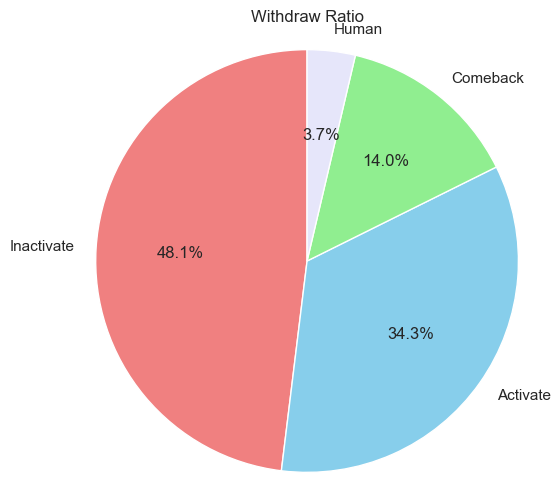

In [71]:
# 각 값의 개수를 세어 Series로 변환
withdraw_counts = cus_churn['cus_status'].replace({1: 'Inactivate', 0: 'Activate', 2: 'Human', 3: 'Comeback'}).value_counts()

# 레이블 설정
withdraw_labels = ['Inactivate', 'Activate', 'Comeback', 'Human']

# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(withdraw_counts, labels=withdraw_labels, autopct='%.1f%%', startangle=90, colors=['lightcoral', 'skyblue', 'lightgreen', 'lavender'])
plt.title('Withdraw Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

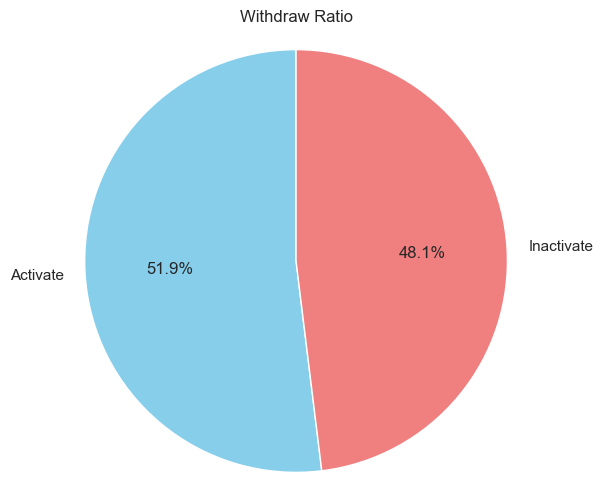

In [70]:
# 각 값의 개수를 세어 Series로 변환
withdraw_counts = cus_churn['cus_status'].replace({1: 'Inactivate', 0: 'Activate', 2: 'Activate', 3: 'Activate'}).value_counts()

# 레이블 설정
withdraw_labels = ['Activate', 'Inactivate']

# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(withdraw_counts, labels=withdraw_labels, autopct='%.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Withdraw Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

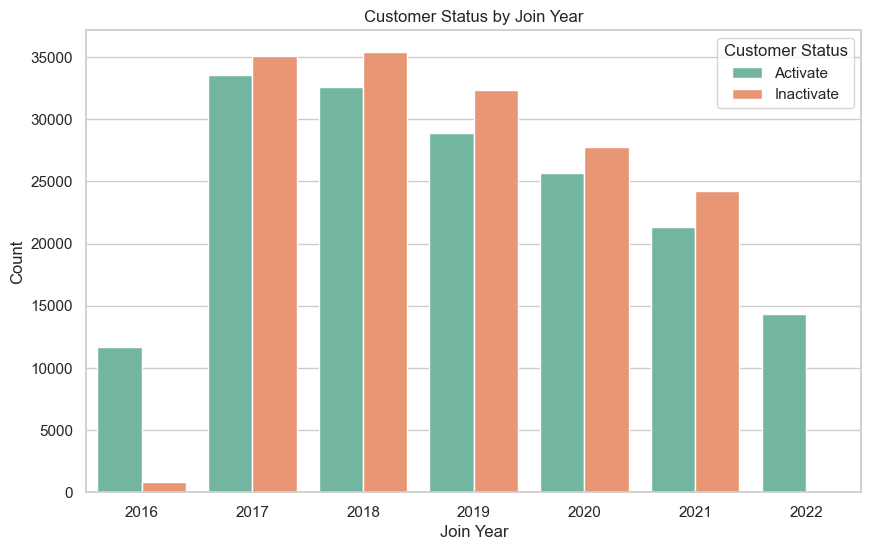

In [72]:
# 각 값에 대한 레이블 설정
status_labels = {
    0: 'Activate',
    1: 'Inactivate',
    2: 'Activate',
    3: 'Activate'
}

# cus_status 값에 해당하는 레이블로 변환
cus_churn['cus_status_label'] = cus_churn['cus_status'].map(status_labels)

# Set2 팔레트 설정
sns.set_palette('Set2')

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.countplot(data=cus_churn, x='join_yr', hue='cus_status_label')
plt.title('Customer Status by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

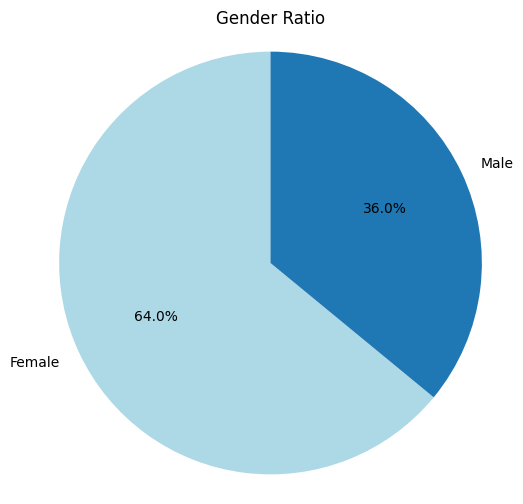

In [145]:
# 각 값의 개수를 세어 Series로 변환
gender_counts = cus_churn['gender'].value_counts()

# 레이블 설정
gender_labels = ['Female', 'Male']

# 원그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_labels, autopct='%.1f%%', startangle=90, colors=['lightblue', '#1f77b4'])
plt.title('Gender Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\neovi\AppData\Local\Temp\ipykernel_17496\2545259956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_churn['cus_status_label'] = cus_churn['cus_status'].map(status_labels)


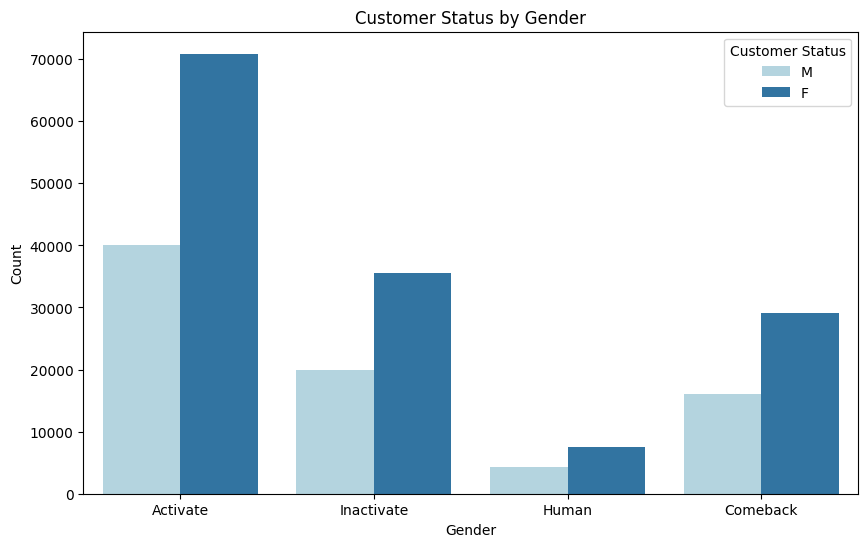

In [164]:
# cus_status 값에 대한 레이블 설정
status_labels = {
    0: 'Activate',
    1: 'Inactivate',
    2: 'Human',
    3: 'Comeback'
}

# cus_status 값에 해당하는 레이블로 변환
cus_churn['cus_status_label'] = cus_churn['cus_status'].map(status_labels)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.countplot(data=cus_churn[cus_churn['cus_status'].isin([0, 1, 2, 3])], x='cus_status_label', hue='gender', palette=['lightblue', '#1f77b4'])
plt.title('Customer Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

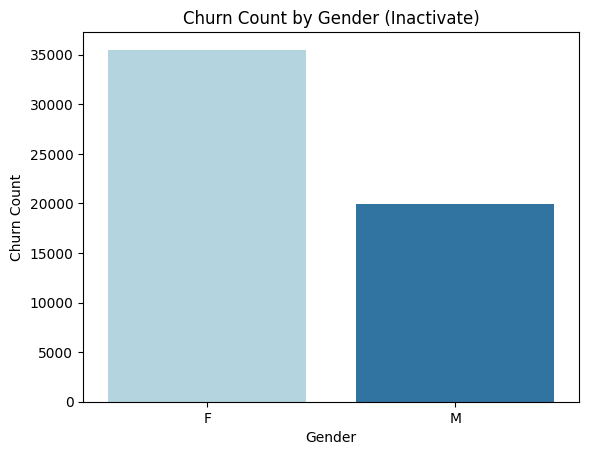

In [165]:
# Set the color palette
sns.set_palette('Set2')

# Filter data for withdraw == 1
churn_withdraw_1 = cus_churn[cus_churn['cus_status'] == 1]

# Create the count plot
sns.countplot(data=churn_withdraw_1, x='gender', palette=['lightblue', '#1f77b4'])

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Churn Count')
plt.title('Churn Count by Gender (Inactivate)')

# Show the plot
plt.show()

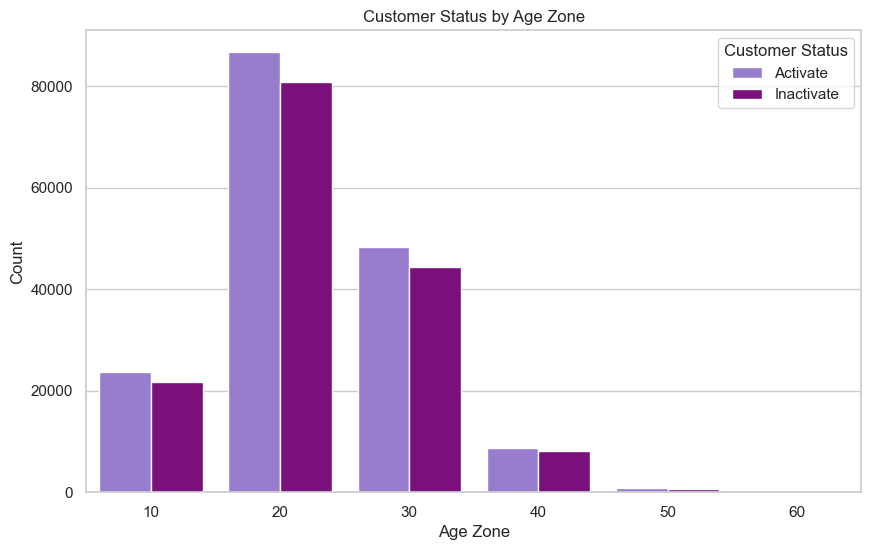

In [64]:
# cus_status 값에 대한 레이블 설정
status_labels = {
    0: 'Activate',
    1: 'Inactivate',
    2: 'Activate',
    3: 'Activate'
}

# cus_status 값에 해당하는 레이블로 변환
cus_churn['cus_status_label'] = cus_churn['cus_status'].map(status_labels)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.countplot(data=cus_churn[cus_churn['cus_status'].isin([0, 1, 2, 3])], x='age_zone', hue='cus_status_label', palette=['#9370DB','#8B008B'])
plt.title('Customer Status by Age Zone')
plt.xlabel('Age Zone')
plt.ylabel('Count')
plt.legend(title='Customer Status')
plt.show()

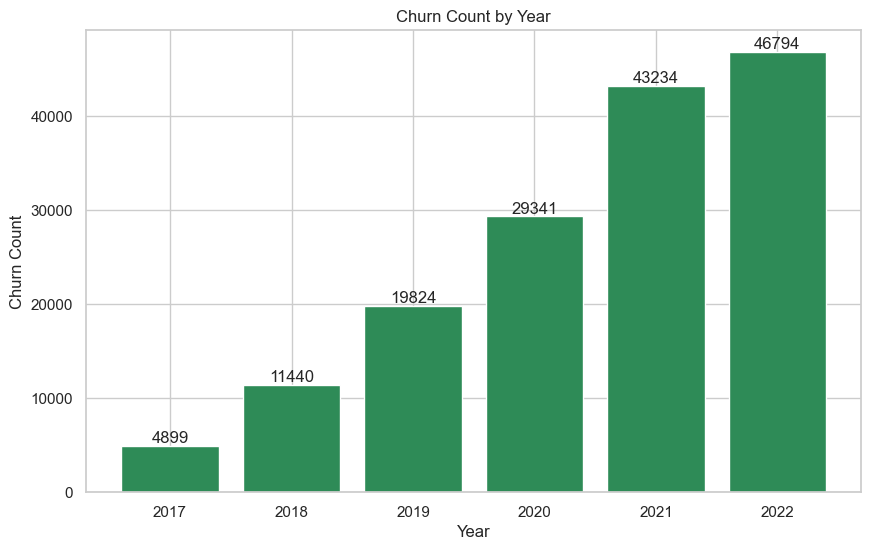

In [84]:
churn_by_year = cus_churn[cus_churn['cus_status'] == 1].groupby(cus_churn['year'])['cus_status'].count()
plt.figure(figsize=(10, 6))
bars = plt.bar(churn_by_year.index, churn_by_year.values, color='seagreen') 

plt.xlabel('Year')
plt.ylabel('Churn Count')
plt.title('Churn Count by Year')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

In [16]:
cus_status = pd.read_csv('cus_status.csv')
cus_status

,customer_id,grade2017,cus_status_2017,grade2018,cus_status_2018,grade2019,cus_status_2019,grade2020,cus_status_2020,grade2021,cus_status_2021,grade2022,cus_status_2022
0,10015,1,0.0,0,2.0,0,1.0,0,1.0,0,1.0,0,1.0
1,10037,1,0.0,0,2.0,0,1.0,0,1.0,0,1.0,0,1.0
2,10044,2,0.0,4,0.0,4,0.0,4,0.0,4,0.0,3,0.0
3,10045,2,0.0,3,0.0,2,0.0,2,0.0,2,0.0,1,0.0
4,10050,5,0.0,4,0.0,4,0.0,4,0.0,4,0.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97349,9992,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0
97350,99946,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0
97351,99962,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0
97352,99963,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0.0


In [49]:
# 'cus_status_2017'부터 'cus_status_2022'까지의 컬럼을 선택
status_columns = [f'cus_status_{year}' for year in range(2017, 2023)]

# 한 번 이라도 1이 포함된 행을 찾음
filtered_data = cus_status[cus_status[status_columns].apply(lambda x: x.eq(1).any(), axis=1)]

# 결과 출력
print(filtered_data)

       customer_id  grade2017  cus_status_2017  grade2018  cus_status_2018  \
0            10015          1              0.0          0              2.0   
1            10037          1              0.0          0              2.0   
5            10054          1              0.0          0              2.0   
6            10059          2              0.0          0              2.0   
8            10120          1              0.0          0              2.0   
...            ...        ...              ...        ...              ...   
88806        99964          0              NaN          0              NaN   
88807        99977          0              NaN          0              NaN   
88808         9998          0              NaN          0              NaN   
88809        99990          0              NaN          0              NaN   
88810        99994          0              NaN          0              NaN   

       grade2019  cus_status_2019  grade2020  cus_status_2020  

In [50]:
# cus_status와 cus_churn 데이터프레임을 customer_id를 기준으로 병합
merged_data = cus_churn.merge(filtered_data, on='customer_id', how='inner')

# 필터링된 행의 total_amount를 계산
result = merged_data.groupby('customer_id')['amount'].sum().reset_index()

# 결과 출력
print(result)

       customer_id    amount
0                2         0
1                4         0
2                5         0
3                7         0
4                8   4758601
...            ...       ...
77124        99993         0
77125        99994         0
77126        99995  54351495
77127        99997    226461
77128       100000         0

[77129 rows x 2 columns]


In [24]:
total_amount_withdraw = result['amount'].sum()
print(total_amount_withdraw)

728327814914


In [27]:
total_amount_all = cus_churn['amount'].sum()
print(total_amount_all)

1412987683005


In [30]:
# 비율을 계산합니다.
ratio = total_amount_withdraw / total_amount_all

# 결과 출력
print(f"total_amount_withdraw 대비 total_amount_all의 비율: {ratio:.2%}")

total_amount_withdraw 대비 total_amount_all의 비율: 51.55%


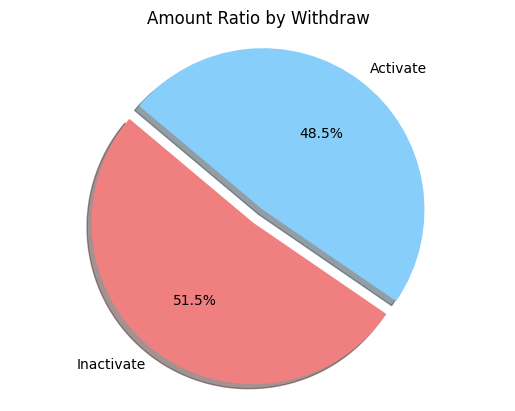

In [35]:
# 이탈한 고객과 나머지 고객들의 비율을 계산합니다.
churned_sales_ratio = total_amount_withdraw / total_amount_all
remaining_sales_ratio = 1 - churned_sales_ratio

# 파이 차트를 생성합니다.
labels = ['Inactivate', 'Activate']
sizes = [churned_sales_ratio, remaining_sales_ratio]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # 이탈한 고객 부분을 조금 돌출시킵니다.

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 원형으로 만듭니다.

# 결과 출력
plt.title('Amount Ratio by Withdraw')
plt.show()

In [51]:
# result와 cus_grade 데이터프레임을 customer_id를 기준으로 병합
merged_data = result.merge(cus_grade, on='customer_id', how='inner')
merged_data

,customer_id,amount_x,year,amount_y,cnt,last_pur_day,m_class,f_class,r_class,amt_coef,grade,grade_num
0,8,4758601,2021,2377241,5,2021-12-14,2,3,3,2.65,SILVER,2
1,8,4758601,2022,1521320,2,2022-05-15,2,2,2,2.00,SILVER,2
2,9,4113630,2021,1732030,3,2021-11-08,2,2,2,2.00,SILVER,2
3,9,4113630,2022,906635,3,2022-05-28,2,2,2,2.00,SILVER,2
4,11,197533,2022,197533,1,2022-03-07,1,1,1,1.00,BLONZE,1
...,...,...,...,...,...,...,...,...,...,...,...,...
77839,99992,14033384,2022,482880,3,2022-05-25,1,2,2,1.62,BLONZE,1
77840,99995,54351495,2020,12205158,12,2020-12-29,5,4,5,4.64,VIP,4
77841,99995,54351495,2021,12363268,29,2021-12-24,4,5,4,4.35,VIP,4
77842,99995,54351495,2022,6868677,18,2022-07-29,4,5,5,4.62,VIP,4


In [52]:
# 등급 별로 amount를 계산
grade_amount = merged_data.groupby('grade')['amount_y'].sum().reset_index()

# 결과 출력
print(grade_amount)

    grade     amount_y
0  BLONZE  19490977103
1    GOLD  62461411357
2  SILVER  38101953011
3     VIP  79736545257
4    VVIP  30167822506


이탈 고객 이전 등급 별 판매량 비율 

    grade     amount_y
0  BLONZE  19490977103
1  SILVER  38101953011
2    GOLD  62461411357
3     VIP  79736545257
4    VVIP  30167822506


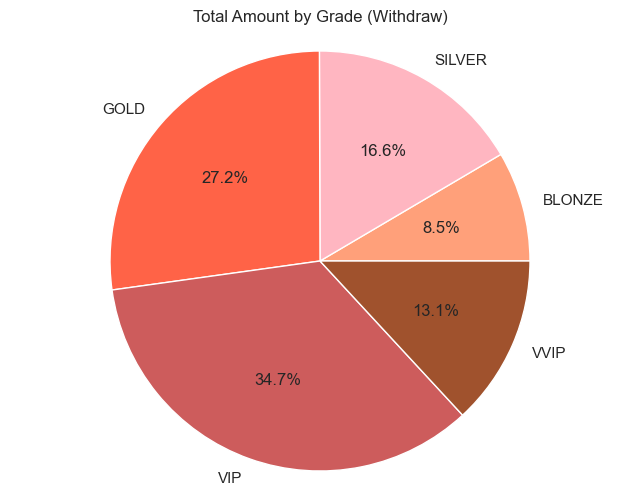

In [81]:
# 등급 순서 설정
grade_order = ['BLONZE', 'SILVER', 'GOLD', 'VIP', 'VVIP']

# 등급 별로 amount를 계산
grade_amount = merged_data.groupby('grade')['amount_y'].sum().reindex(grade_order).reset_index()

# 결과 출력
print(grade_amount)

# 퍼센트로 변환
grade_amount['percent'] = (grade_amount['amount_y'] / grade_amount['amount_y'].sum()) * 100

# 파이차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(grade_amount['percent'], labels=grade_amount['grade'], autopct='%1.1f%%', colors=[ 'lightsalmon', 'lightpink', 'tomato', 'indianred', 'sienna'])
plt.title('Total Amount by Grade (Withdraw)')
plt.axis('equal')  # 원형 모양으로 설정

plt.show()

    grade     amount_y
0  BLONZE  19490977103
1  SILVER  38101953011
2    GOLD  62461411357
3     VIP  79736545257
4    VVIP  30167822506


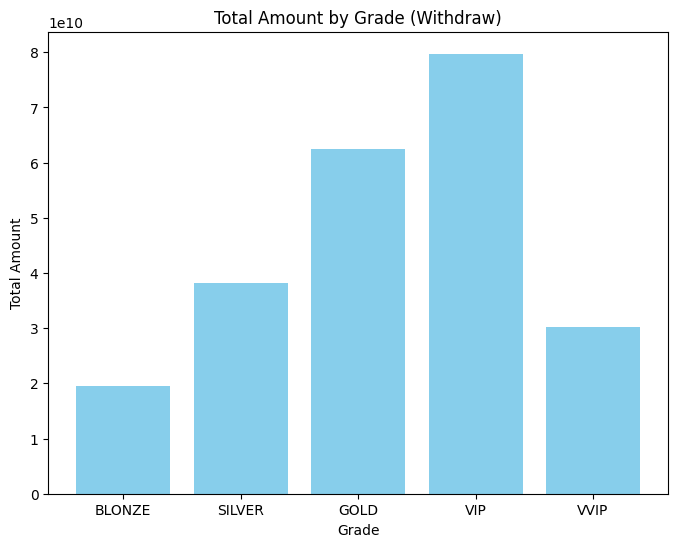

In [57]:
# 등급 순서 설정
grade_order = ['BLONZE', 'SILVER', 'GOLD', 'VIP', 'VVIP']

# 등급 별로 amount를 계산
grade_amount = merged_data.groupby('grade')['amount_y'].sum().reindex(grade_order).reset_index()

# 결과 출력
print(grade_amount)

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(grade_amount['grade'], grade_amount['amount_y'], color='skyblue')
plt.xlabel('Grade')
plt.ylabel('Total Amount')
plt.title('Total Amount by Grade (Withdraw)')
plt.show()

연도 별 등급 인원 수 카운트 

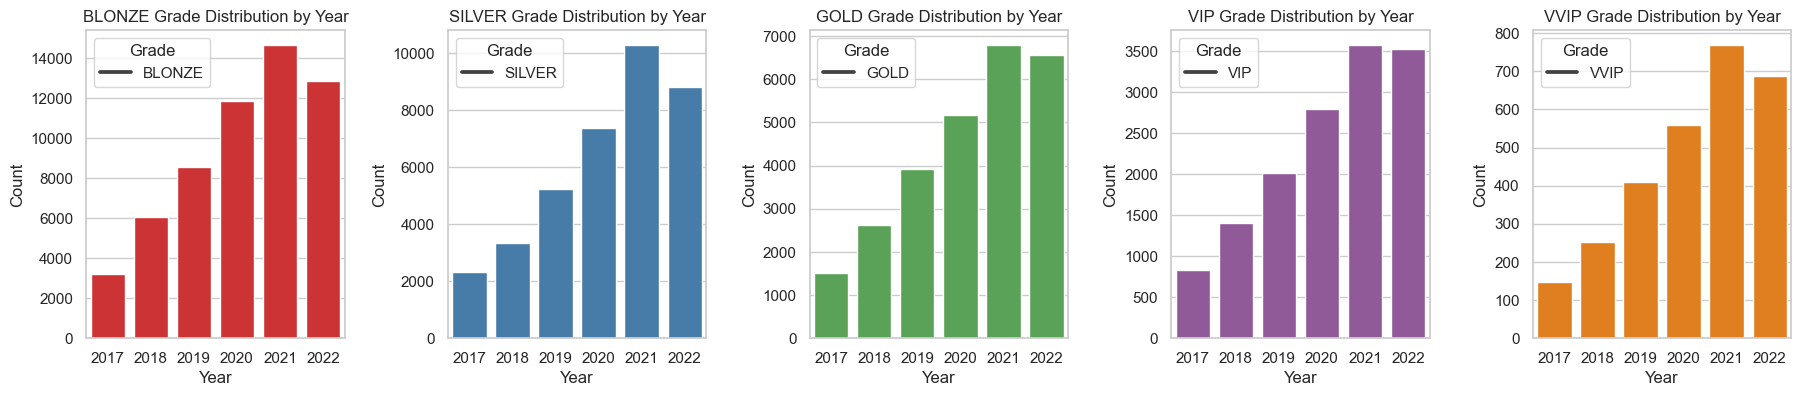

In [68]:
# 등급 필터링
selected_grades = ['BLONZE', 'SILVER', 'GOLD', 'VIP', 'VVIP']

# 두 줄로 작게 분할하여 그래프 생성
num_cols = len(selected_grades)  # 한 줄에 그래프 수
num_rows = 1  # 한 줄에 그래프를 하나만 표시

plt.figure(figsize=(22, 4))

for i, grade in enumerate(selected_grades):
    selected_data = cus_grade[cus_grade['grade'] == grade]
    
    # 연도별 grade 카운트 집계
    grade_counts_by_year = selected_data.groupby(['year', 'grade']).size().reset_index(name='count')

    # 그래프 위치 설정
    plt.subplot(num_rows, num_cols, i + 1)

    # 시각화
    sns.set(style='whitegrid')
    ax = sns.barplot(data=grade_counts_by_year, x='year', y='count', color=sns.color_palette("Set1")[i])

    plt.title(f'{grade} Grade Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')

    # 범례 위치 조정
    plt.legend([grade], title='Grade', loc='upper left')

    # 그래프 간 간격 조정
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

In [ ]:
cus_grade.dtypes

year              int32
customer_id      object
amount            int64
cnt               int64
last_pur_day     object
m_class           int64
f_class           int64
r_class           int64
amt_coef        float64
grade            object
grade_num         int64
dtype: object

등급 별 프로모션 사용 

In [88]:
grade_promo = pd.read_csv('grade_promo.csv')
grade_promo

C:\Users\neovi\AppData\Local\Temp\ipykernel_28152\28309324.py:1: DtypeWarning: Columns (3,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  grade_promo = pd.read_csv('grade_promo.csv')


,year,customer_id,amount,cnt,last_pur_day,m_class,f_class,r_class,amt_coef,grade,promo_code_count,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2016,100,62025,1,2016-08-15,1,2,1.0,1.5,BLONZE,1.0,NaN,NaN,NaN,NaN
1,2016,10012,173307,1,2016-07-16,1,2,1.0,1.5,BLONZE,1.0,NaN,NaN,NaN,NaN
2,2016,10087,409875,1,2016-09-25,2,2,1.0,2.0,SILVER,0.0,NaN,NaN,NaN,NaN
3,2016,10164,274432,1,2016-11-19,1,2,2.0,1.5,BLONZE,1.0,NaN,NaN,NaN,NaN
4,2016,10173,469964,2,2016-12-21,2,3,4.0,2.5,SILVER,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138595,2022,99989,171997,1,2022-04-03,1,1,1.0,1,BLONZE,0.0,NaN,NaN,NaN,NaN
138596,2022,9999,263256,1,2022-03-29,1,1,1.0,1,BLONZE,0.0,NaN,NaN,NaN,NaN
138597,2022,99992,482880,3,2022-05-25,1,2,2.0,1.61,BLONZE,0.0,NaN,NaN,NaN,NaN
138598,2022,99995,9702007,21,2022-07-29,3,4,5.0,3.86,GOLD,3.0,NaN,NaN,NaN,NaN


In [89]:
grade_promo = grade_promo[grade_promo['year'] != 2016]
grade_promo = grade_promo.drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis=1)

In [90]:
# "grade" 컬럼이 1인 행 삭제
grade_promo = grade_promo[grade_promo['grade'] != '1']

In [91]:
grade_promo

,year,customer_id,amount,cnt,last_pur_day,m_class,f_class,r_class,amt_coef,grade,promo_code_count
2407,2017,10015,162259,1,2017-05-24,1,2,1.0,1.35,BLONZE,0.0
2408,2017,10037,91071,1,2017-06-03,1,2,1.0,1.35,BLONZE,1.0
2409,2017,10044,891856,5,2017-12-19,2,3,4.0,2.92,SILVER,2.0
2410,2017,10045,2415234,3,2017-10-16,3,3,2.0,2.72,SILVER,2.0
2411,2017,10050,25666202,29,2017-12-30,5,5,5.0,5.0,VVIP,17.0
...,...,...,...,...,...,...,...,...,...,...,...
138595,2022,99989,171997,1,2022-04-03,1,1,1.0,1,BLONZE,0.0
138596,2022,9999,263256,1,2022-03-29,1,1,1.0,1,BLONZE,0.0
138597,2022,99992,482880,3,2022-05-25,1,2,2.0,1.61,BLONZE,0.0
138598,2022,99995,9702007,21,2022-07-29,3,4,5.0,3.86,GOLD,3.0


In [232]:
# 연도와 grade를 기준으로 그룹화하여 promo_code_count의 평균값 계산
average_promo_by_year_grade = grade_promo.groupby(['year', 'grade'])['promo_code_count'].mean().reset_index()

# 결과 확인
print(average_promo_by_year_grade)

    year   grade  promo_code_count
0   2017  BLONZE          0.515228
1   2017    GOLD          3.870573
2   2017  SILVER          1.315074
3   2017     VIP         10.969916
4   2017    VVIP         21.954955
5   2018  BLONZE          0.594643
6   2018    GOLD          5.073562
7   2018  SILVER          1.917725
8   2018     VIP         13.538684
9   2018    VVIP         25.864583
10  2019  BLONZE          0.623609
11  2019    GOLD          5.728953
12  2019  SILVER          2.114102
13  2019     VIP         13.971628
14  2019    VVIP         27.500000
15  2020  BLONZE          0.612336
16  2020    GOLD          5.665135
17  2020  SILVER          2.092559
18  2020     VIP         13.797080
19  2020    VVIP         25.871359
20  2021  BLONZE          0.658316
21  2021    GOLD          5.838158
22  2021  SILVER          2.196144
23  2021     VIP         13.424363
24  2021    VVIP         23.855596
25  2022  BLONZE          0.604611
26  2022    GOLD          4.329167
27  2022  SILVER    

C:\Users\neovi\AppData\Local\Temp\ipykernel_17496\1322923177.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=average_promo_by_year[average_promo_by_year['year'] == year], x="grade", y="promo_code_count", ci=None, ax=axes[row, col], order=grade_order)
C:\Users\neovi\AppData\Local\Temp\ipykernel_17496\1322923177.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=average_promo_by_year[average_promo_by_year['year'] == year], x="grade", y="promo_code_count", ci=None, ax=axes[row, col], order=grade_order)
C:\Users\neovi\AppData\Local\Temp\ipykernel_17496\1322923177.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=average_promo_by_year[average_promo_by_year['year'] == year], x="grade", y="promo_code_count", ci=None, ax=axes[row, col], order=grade_order)
C:\Users\neovi\AppD

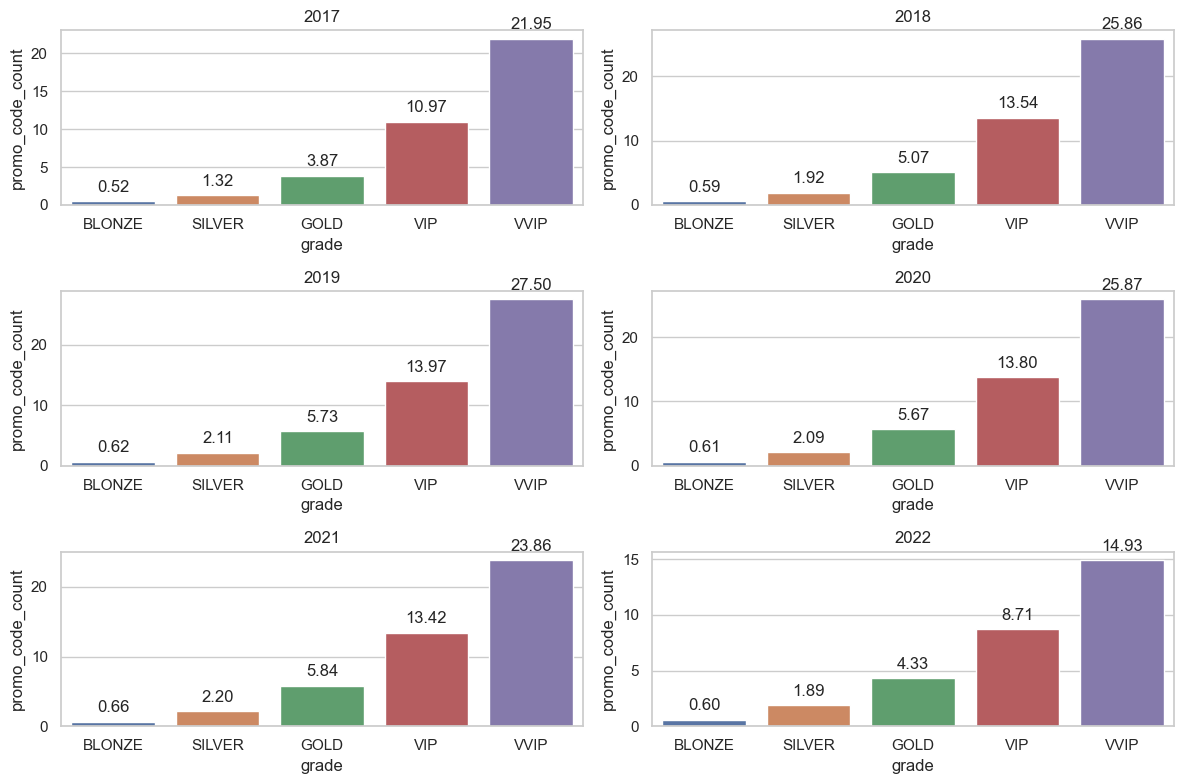

In [296]:
# 연도별로 그룹화하여 promo_code_count의 평균값 계산
average_promo_by_year = grade_promo.groupby(['year', 'grade'])['promo_code_count'].mean().reset_index()

# 순서를 정의하는 리스트
grade_order = ['BLONZE', 'SILVER', 'GOLD', 'VIP', 'VVIP']

# 그래프 시각화
sns.set(style="whitegrid")

# 각 연도별로 두 줄에 그래프 나열
years = average_promo_by_year['year'].unique()
num_columns = 2  # 한 행당 그래프 개수
num_rows = (len(years) + num_columns - 1) // num_columns  # 필요한 행 수
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 8))

for i, year in enumerate(years):
    row = i // num_columns
    col = i % num_columns
    ax = sns.barplot(data=average_promo_by_year[average_promo_by_year['year'] == year], x="grade", y="promo_code_count", ci=None, ax=axes[row, col], order=grade_order)
    ax.set_title(f"{year}")

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


상품 판매

In [14]:
grade_product = pd.read_csv('grade_product_new.csv')
grade_product

,year,grade,masterCategory,subCategory,total_item_price
0,2017,BLONZE,Accessories,Accessories,2832877
1,2017,BLONZE,Accessories,Bags,57676684
2,2017,BLONZE,Accessories,Belts,12187346
3,2017,BLONZE,Accessories,Cufflinks,1429350
4,2017,BLONZE,Accessories,Eyewear,21382031
...,...,...,...,...,...
1331,2022,VVIP,Personal Care,Perfumes,307489
1332,2022,VVIP,Personal Care,Skin,8690053
1333,2022,VVIP,Personal Care,Skin Care,14545230
1334,2022,VVIP,Sporting Goods,Sports Equipment,3325850


In [31]:
# 연도별로 grade별 masterCategory의 종류별 count를 보여줌
result = grade_product.groupby(['year', 'grade', 'masterCategory', 'subCategory'])['total_item_price'].sum().reset_index(name='count')

# 결과 확인
print(result)

      year   grade  masterCategory       subCategory     count
0     2017  BLONZE     Accessories       Accessories   2832877
1     2017  BLONZE     Accessories              Bags  57676684
2     2017  BLONZE     Accessories             Belts  12187346
3     2017  BLONZE     Accessories         Cufflinks   1429350
4     2017  BLONZE     Accessories           Eyewear  21382031
...    ...     ...             ...               ...       ...
1331  2022    VVIP   Personal Care          Perfumes    307489
1332  2022    VVIP   Personal Care              Skin   8690053
1333  2022    VVIP   Personal Care         Skin Care  14545230
1334  2022    VVIP  Sporting Goods  Sports Equipment   3325850
1335  2022    VVIP  Sporting Goods        Wristbands    935479

[1336 rows x 5 columns]


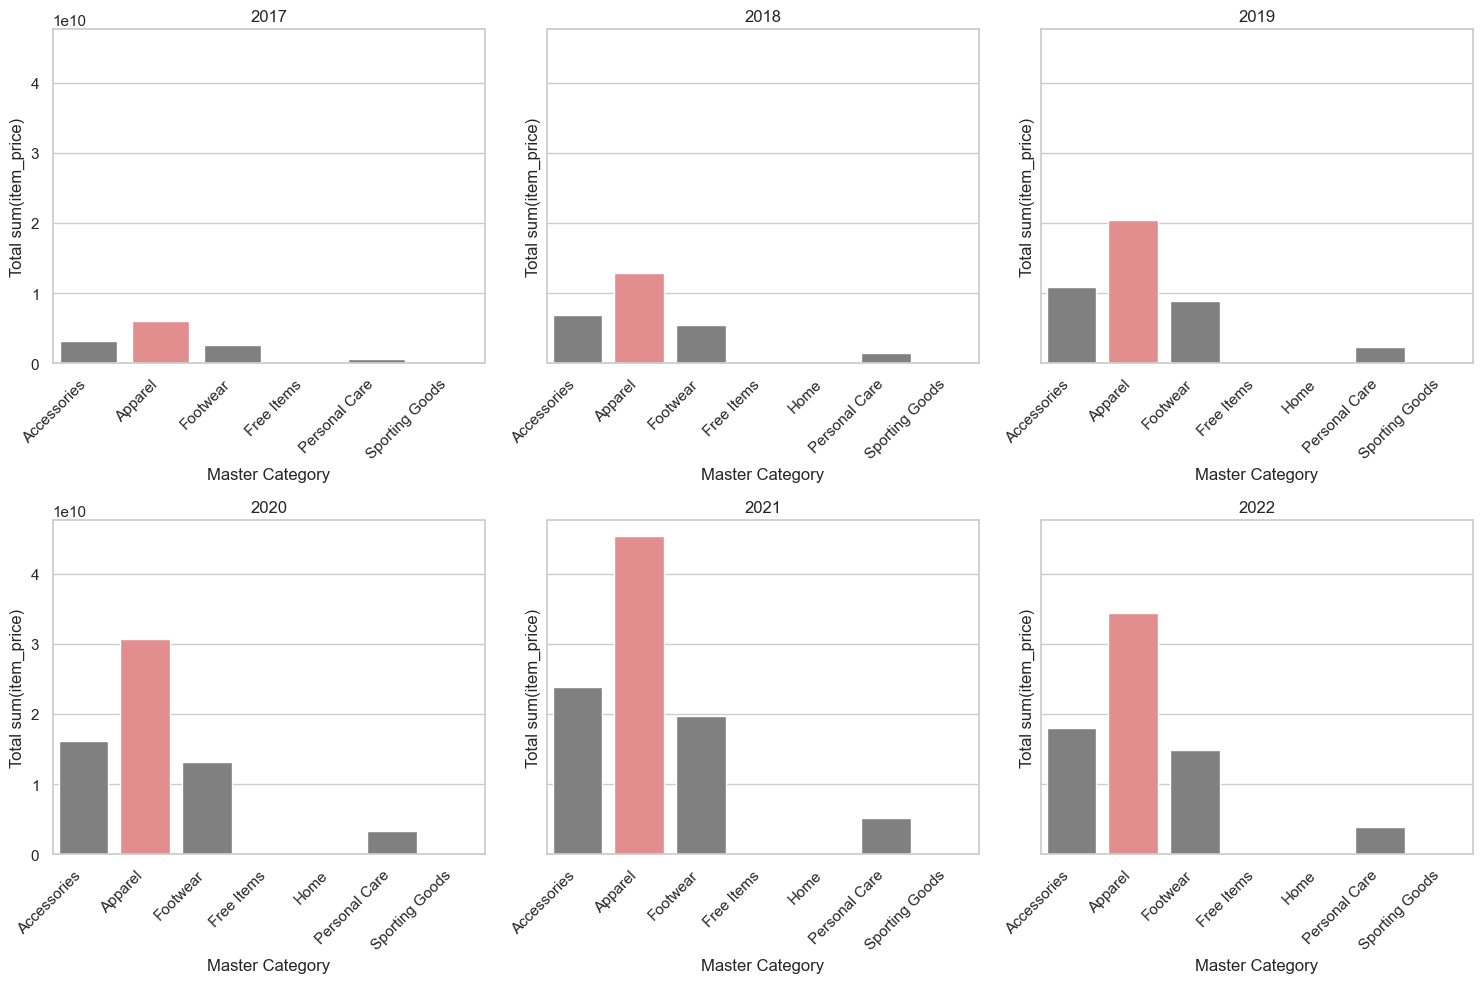

In [46]:
# 연도별로 masterCategory의 종류별 평균 sum(item_price) 값을 계산
result = grade_product.groupby(['year', 'masterCategory'])['total_item_price'].sum().reset_index(name='count')

# 시각화
sns.set(style="whitegrid")

# 각 연도별로 그래프 그리기
years = result['year'].unique()
num_columns = 3  # 한 행당 그래프 개수
num_rows = (len(years) + num_columns - 1) // num_columns  # 필요한 행 수
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows), sharey=True)

for i, year in enumerate(years):
    row = i // num_columns
    col = i % num_columns
    data = result[result['year'] == year]
    
    # 가장 높은 값을 가지는 항목의 인덱스 가져오기
    max_index = data['count'].idxmax()
    max_category = data.loc[max_index, 'masterCategory']
    
    # 각 항목에 대한 색상 리스트 생성
    colors = ['lightcoral' if category == max_category else 'gray' for category in data['masterCategory']]
    
    ax = sns.barplot(data=data, x="masterCategory", y="count", palette=colors, ax=axes[row, col])
    ax.set_title(f"{year}")
    ax.set_xlabel("Master Category")
    ax.set_ylabel("Total sum(item_price)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # x축 레이블 회전

plt.tight_layout()
plt.show()

In [39]:
# masterCategory가 "apparel"인 데이터만 필터링
apparel_data = grade_product[grade_product['masterCategory'] == 'Apparel']
apparel_data

,year,grade,masterCategory,subCategory,total_item_price
18,2017,BLONZE,Apparel,Apparel Set,2621915
19,2017,BLONZE,Apparel,Bottomwear,50985089
20,2017,BLONZE,Apparel,Dress,11679389
21,2017,BLONZE,Apparel,Innerwear,33269409
22,2017,BLONZE,Apparel,Loungewear and Nightwear,10306251
...,...,...,...,...,...
1314,2022,VVIP,Apparel,Innerwear,256295068
1315,2022,VVIP,Apparel,Loungewear and Nightwear,62560514
1316,2022,VVIP,Apparel,Saree,60696531
1317,2022,VVIP,Apparel,Socks,2520032


C:\Users\neovi\AppData\Local\Temp\ipykernel_4276\1957711948.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rank'] = data['count'].rank(ascending=False, method='min')
C:\Users\neovi\AppData\Local\Temp\ipykernel_4276\1957711948.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rank'] = data['count'].rank(ascending=False, method='min')
C:\Users\neovi\AppData\Local\Temp\ipykernel_4276\1957711948.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

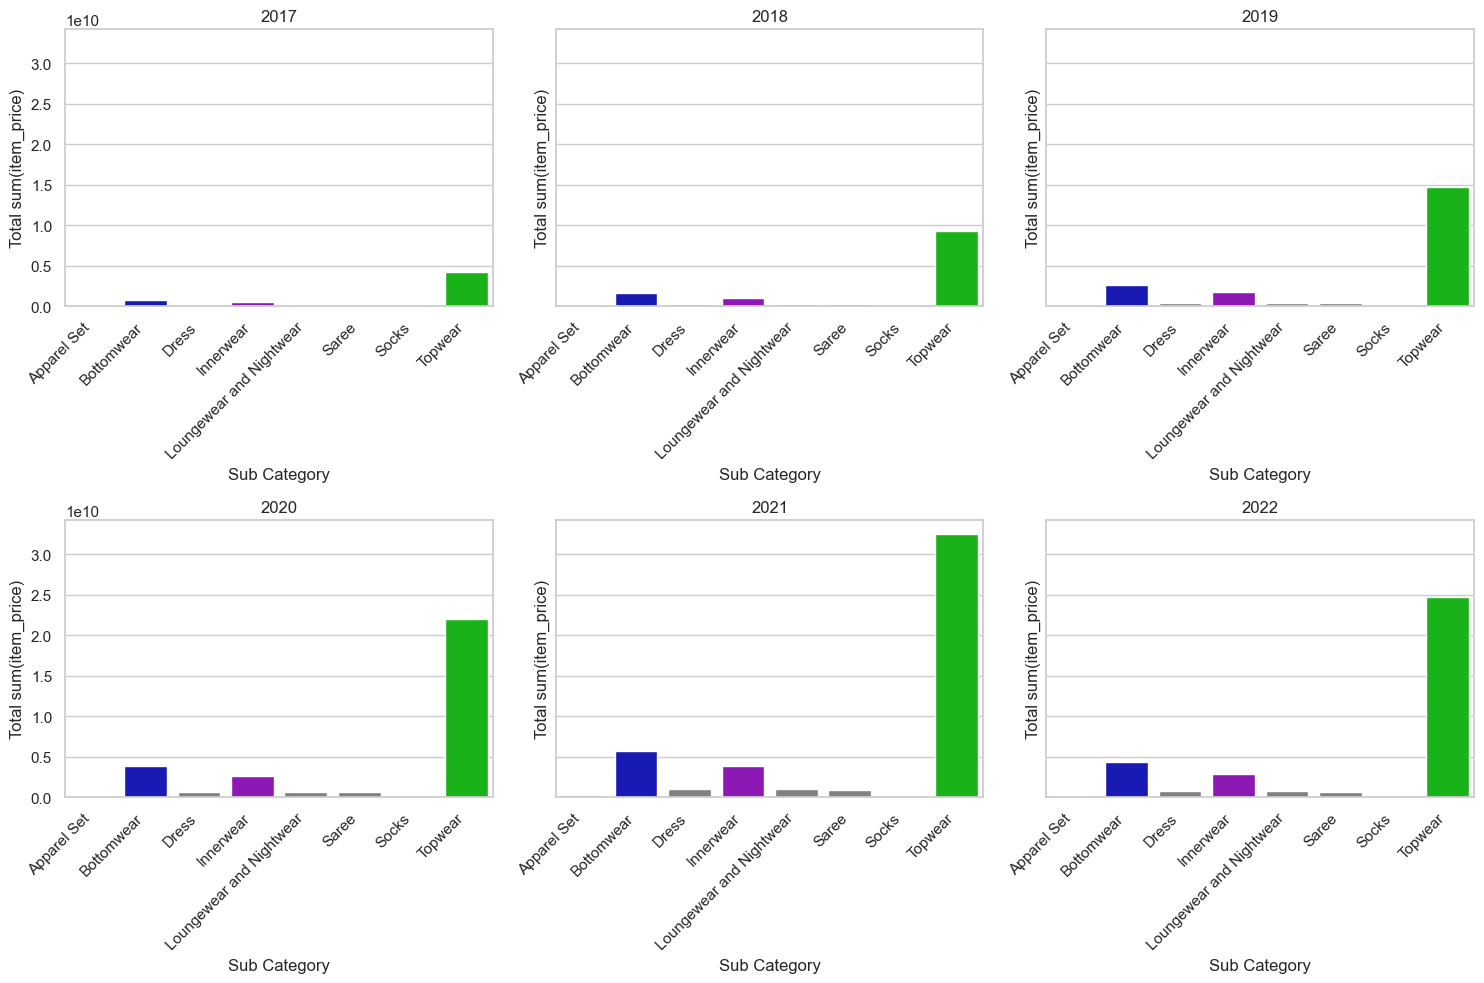

In [44]:
# masterCategory가 "apparel"인 데이터만 필터링
apparel_data = grade_product[grade_product['masterCategory'] == 'Apparel']

# 연도별로 subCategory의 종류별 평균 total_item_price 값을 계산
result = apparel_data.groupby(['year', 'subCategory'])['total_item_price'].sum().reset_index(name='count')

# 컬러 팔레트 정의 (3위까지 초록, 파랑, 보라, 그 외 회색)
color_palette = ['#00cc00', '#0000cc', '#9900cc', 'gray']

# 시각화
sns.set(style="whitegrid")

# 각 연도별로 그래프 그리기
years = result['year'].unique()
num_columns = 3  # 한 행당 그래프 개수
num_rows = (len(years) + num_columns - 1) // num_columns  # 필요한 행 수
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows), sharey=True)

for i, year in enumerate(years):
    row = i // num_columns
    col = i % num_columns
    data = result[result['year'] == year]
    
    # total_item_price를 기준으로 순위 매기기
    data['rank'] = data['count'].rank(ascending=False, method='min')
    
    # 순위에 따라 색상 설정 (3위까지는 color_palette 사용, 나머지는 회색)
    colors = [color_palette[0] if rank == 1 else color_palette[1] if rank == 2 else color_palette[2] if rank == 3 else color_palette[3] for rank in data['rank']]
    
    ax = sns.barplot(data=data, x="subCategory", y="count", palette=colors, ax=axes[row, col])
    ax.set_title(f"{year}")
    ax.set_xlabel("Sub Category")
    ax.set_ylabel("Total sum(item_price)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # x축 레이블 회전

plt.tight_layout()
plt.show()

In [21]:
grade_product2 = pd.read_csv('grade_product.csv')
grade_product2

,year,grade,masterCategory,sum(item_price)
0,2016,BLONZE,Accessories,38600052
1,2016,BLONZE,Apparel,75166020
2,2016,BLONZE,Footwear,31102668
3,2016,BLONZE,Free Items,450904
4,2016,BLONZE,Personal Care,9424093
...,...,...,...,...
217,2022,VVIP,Apparel,3127305485
218,2022,VVIP,Footwear,1331707554
219,2022,VVIP,Free Items,14025188
220,2022,VVIP,Personal Care,356124809


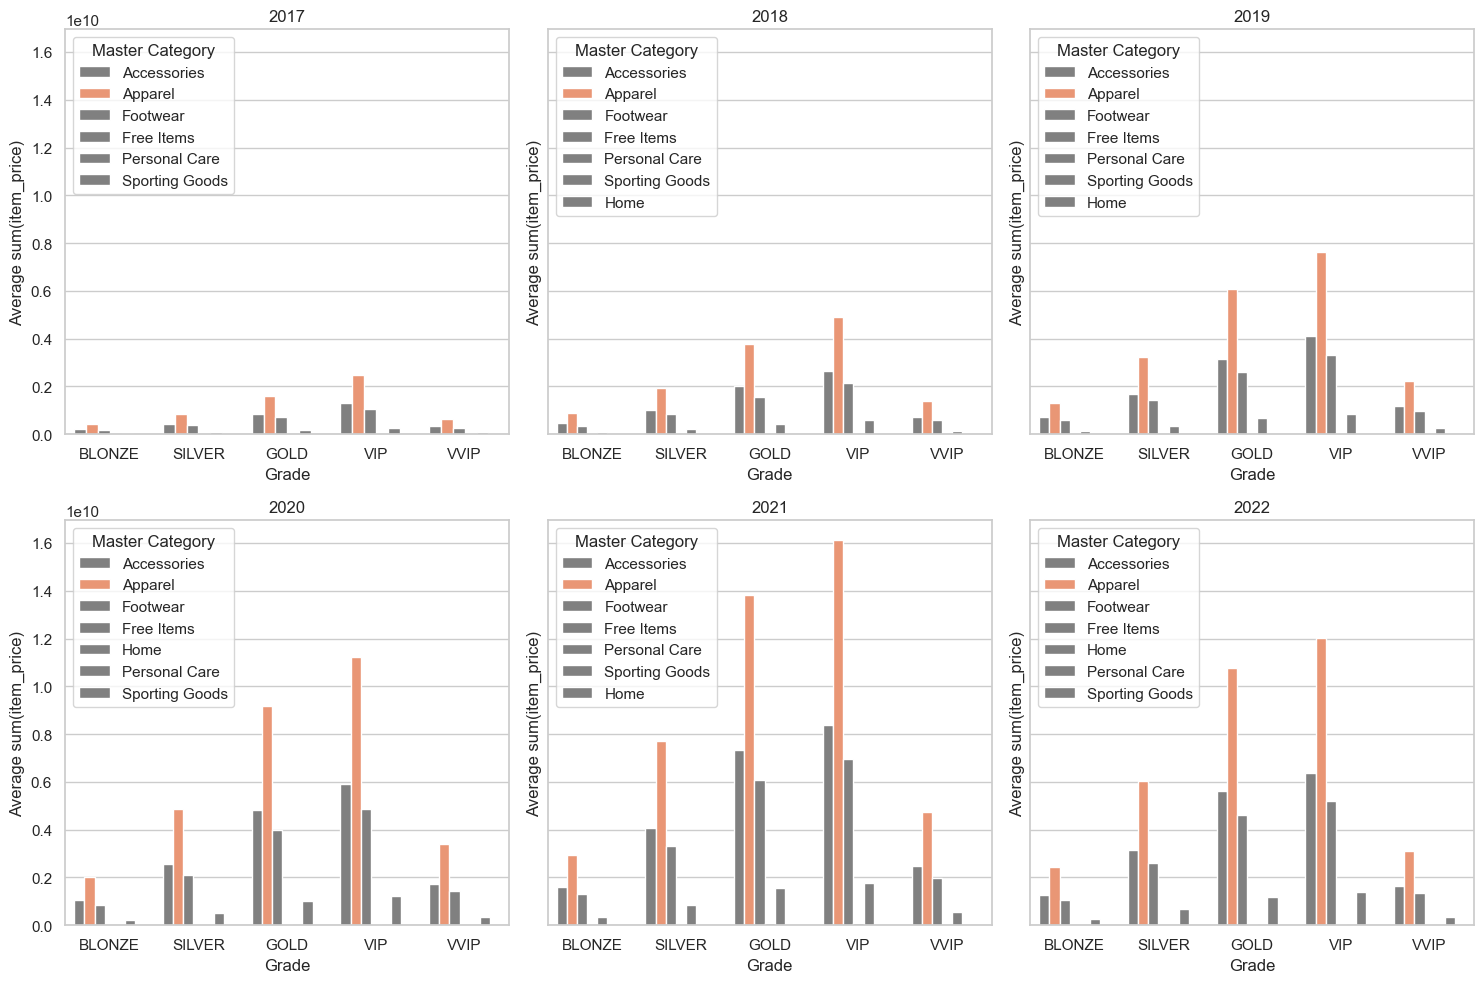

In [298]:
# 연도별로 grade별 masterCategory의 종류별 평균 sum(item_price) 값을 계산
result = grade_product.groupby(['year', 'grade', 'masterCategory'])['sum(item_price)'].mean().reset_index(name='count')

# 등급 순서를 정의하는 리스트
grade_order = ['BLONZE', 'SILVER', 'GOLD', 'VIP', 'VVIP']

# 시각화
sns.set(style="whitegrid")

# 각 연도별로 그래프 그리기
years = result['year'].unique()
num_columns = 3  # 한 행당 그래프 개수
num_rows = (len(years) + num_columns - 1) // num_columns  # 필요한 행 수
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows), sharey=True)

for i, year in enumerate(years):
    row = i // num_columns
    col = i % num_columns
    data = result[result['year'] == year]
    
    # 가장 높은 값을 가지는 항목의 인덱스 가져오기
    max_index = data['count'].idxmax()
    max_category = data.loc[max_index, 'masterCategory']
    
    # 각 항목에 대한 색상 리스트 생성
    colors = [color_palette[1] if category == max_category else 'gray' for category in data['masterCategory']]
    
    ax = sns.barplot(data=data, x="grade", y="count", hue="masterCategory", order=grade_order, palette=colors, ax=axes[row, col])
    ax.set_title(f"{year}")
    ax.set_xlabel("Grade")
    ax.set_ylabel("Average sum(item_price)")
    ax.legend(title="Master Category", loc='upper left')
    ax.set_xticklabels(grade_order)  # 등급 이름 표시

plt.tight_layout()
plt.show()

등급 별 총 판매액 

In [299]:
# 연도와 등급을 기준으로 그룹화하고 각 그룹에서 amount 열의 총합 계산
total_amount_gr_yr = cus_grade.groupby(['year', 'grade'])['amount'].sum().reset_index()

print(total_amount_gr_yr)

    year   grade       amount
0   2017  BLONZE    992970546
1   2017    GOLD   4625038873
2   2017  SILVER   2707216053
3   2017     VIP   7239553575
4   2017    VVIP   2404953279
5   2018  BLONZE   2947789316
6   2018    GOLD  10474847990
7   2018  SILVER   5213029504
8   2018     VIP  14632314665
9   2018    VVIP   5149066191
10  2019  BLONZE   4249148744
11  2019    GOLD  17244850310
12  2019  SILVER   8676009395
13  2019     VIP  22470276300
14  2019    VVIP   8443493420
15  2020  BLONZE   6464410551
16  2020    GOLD  25195637502
17  2020  SILVER  14294417424
18  2020     VIP  33140189601
19  2020    VVIP  12360752014
20  2021  BLONZE   8876251078
21  2021    GOLD  38042962793
22  2021  SILVER  22963239485
23  2021     VIP  47076429953
24  2021    VVIP  18314503793
25  2022  BLONZE   7177969112
26  2022    GOLD  29833421716
27  2022  SILVER  16740708071
28  2022     VIP  36221994214
29  2022    VVIP  12262951039


c:\Users\neovi\Documents\Bootcamp\TP2\tp2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\neovi\Documents\Bootcamp\TP2\tp2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


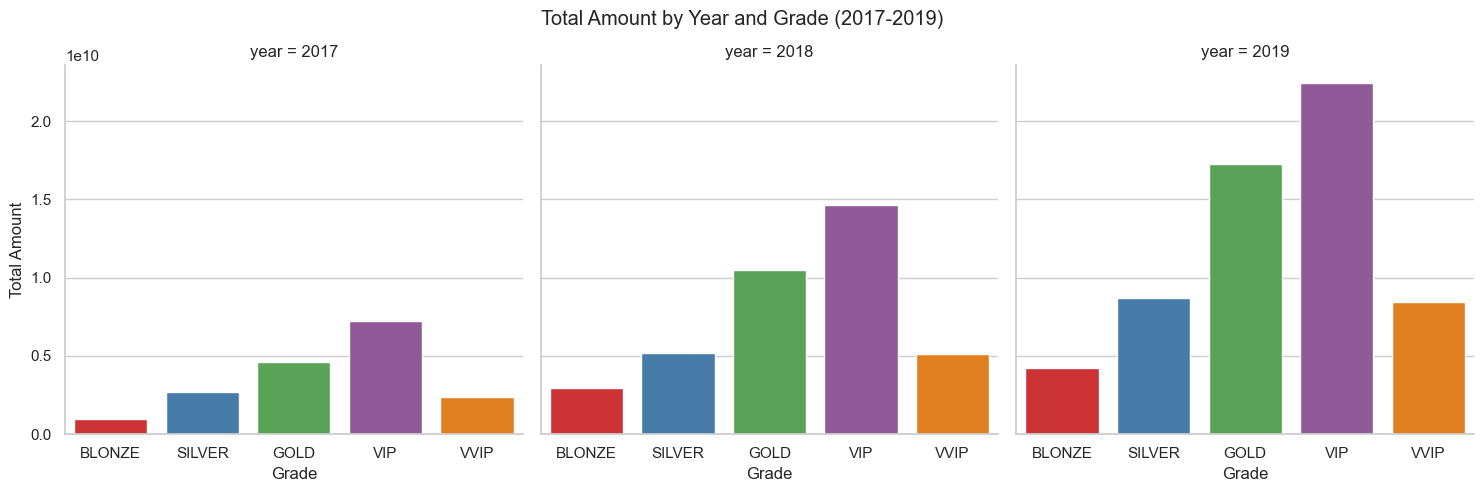

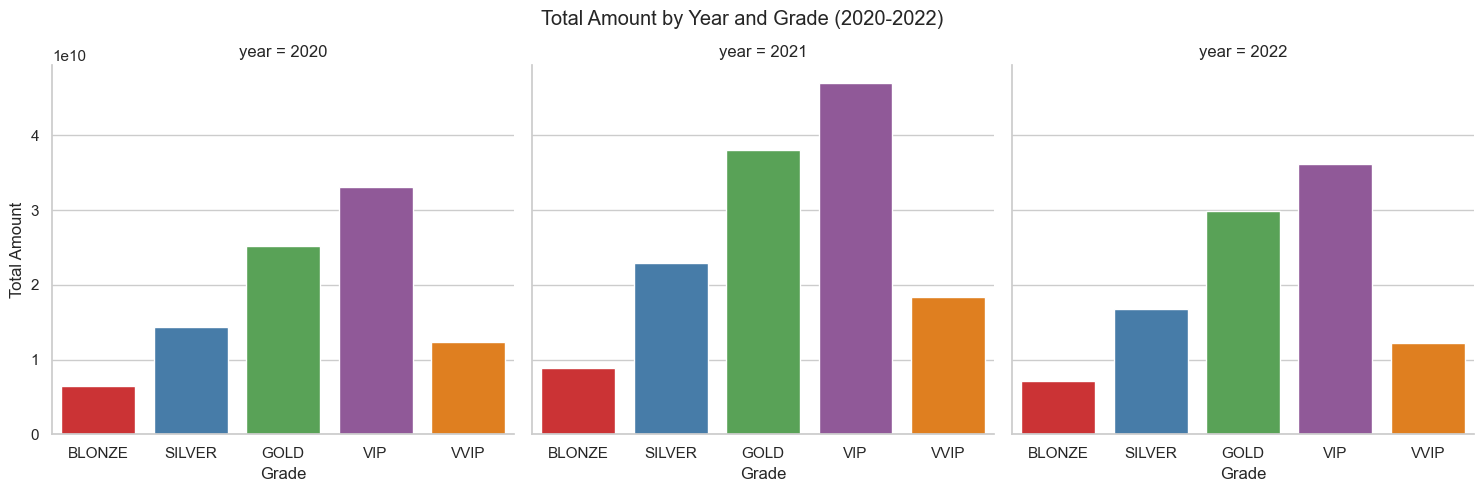

In [315]:
# 데이터를 연도와 등급으로 그룹화하고 총합 계산
total_amount_gr_yr = cus_grade.groupby(['year', 'grade'])['amount'].sum().reset_index()

# 등급 순으로 데이터 정렬
grade_order = ["BLONZE", "SILVER", "GOLD", "VIP", "VVIP"]
total_amount_gr_yr['grade'] = pd.Categorical(total_amount_gr_yr['grade'], categories=grade_order, ordered=True)
total_amount_gr_yr = total_amount_gr_yr.sort_values(['year', 'grade'])

sns.set(style="whitegrid")

# 첫 번째 줄: 2017, 2018, 2019 년 그래프
g1 = sns.FacetGrid(total_amount_gr_yr[total_amount_gr_yr['year'].isin([2017, 2018, 2019])], col="year", height=5)
(g1.map_dataframe(sns.barplot, x="grade", y="amount", palette="Set1")
 .set_axis_labels("Grade", "Total Amount"))

# 두 번째 줄: 2020, 2021, 2022 년 그래프
g2 = sns.FacetGrid(total_amount_gr_yr[total_amount_gr_yr['year'].isin([2020, 2021, 2022])], col="year", height=5)
(g2.map_dataframe(sns.barplot, x="grade", y="amount", palette="Set1")
 .set_axis_labels("Grade", "Total Amount"))

# 그래프 타이틀 및 레이아웃 조정
g1.fig.subplots_adjust(top=0.87)  # 첫 번째 줄의 타이틀과 그래프 간격 조절
g1.fig.suptitle("Total Amount by Year and Grade (2017-2019)")
g2.fig.subplots_adjust(top=0.87)  # 두 번째 줄의 타이틀과 그래프 간격 조절
g2.fig.suptitle("Total Amount by Year and Grade (2020-2022)")

plt.show()